In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('65 Years of Weather Data Bangladesh (1948 - 2013).csv')
df = df.drop(labels=["No","YEAR","Month","ALT","Station_Number","X_COR","Y_COR","LATITUDE","LONGITUDE","Period"], axis=1)
df.head()

,Station_Names,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine
0,Barisal,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915
1,Barisal,30.0,14.1,0.0,77.0,0.453704,0.8,7.831915
2,Barisal,28.2,12.3,0.0,77.0,0.453704,0.6,7.831915
3,Barisal,26.6,12.3,2.0,77.0,0.453704,1.0,7.831915
4,Barisal,30.0,13.3,10.0,75.0,0.453704,1.6,7.831915


In [7]:
x= df.iloc[:,[0,1,2,3,4,6,7]]
y= df.iloc[:,5]

In [8]:
StationName= pd.get_dummies(x["Station_Names"],drop_first=True)
x=x.drop("Station_Names",axis=1)
x=pd.concat([x,StationName],axis=1)
# x.head()

In [9]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

In [10]:
# Standard Scaler

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

In [11]:
# MLPRegressor

from sklearn.neural_network import MLPRegressor

mlp_reg = MLPRegressor(hidden_layer_sizes=(150,100,50),
                       max_iter = 300,activation = 'relu',
                       solver = 'adam')

mlp_reg.fit(trainX_scaled, trainY)

MLPRegressor(hidden_layer_sizes=(150, 100, 50), max_iter=300)

In [12]:
y_pred = mlp_reg.predict(testX_scaled)
df_temp = pd.DataFrame({'Actual': testY, 'Predicted': y_pred})
df_temp.head()

,Actual,Predicted
4453,1.8,1.497751
9593,0.9,0.699110
11104,0.3,1.260387
17415,1.9,1.168967
14458,1.7,3.730370


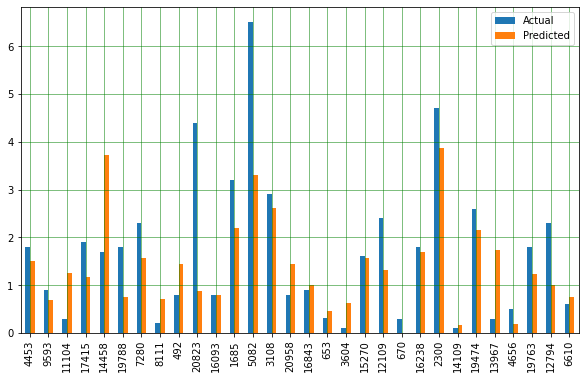

In [13]:
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()

Text(0, 0.5, 'Cost')

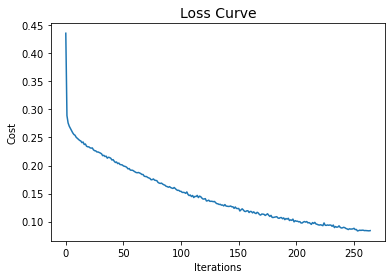

In [14]:
plt.plot(mlp_reg.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')

In [15]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [16]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(mlp_reg, param_grid, n_jobs= -1, cv=5)
grid.fit(trainX_scaled, trainY)

print(grid.best_params_) 

{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant', 'max_iter': 50, 'solver': 'adam'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [17]:
grid_predictions = grid.predict(testX_scaled) 
df_temp2 = pd.DataFrame({'Actual': testY, 'Predicted': grid_predictions})
df_temp2.head()

,Actual,Predicted
4453,1.8,1.306943
9593,0.9,1.131881
11104,0.3,1.100628
17415,1.9,0.863341
14458,1.7,1.750516


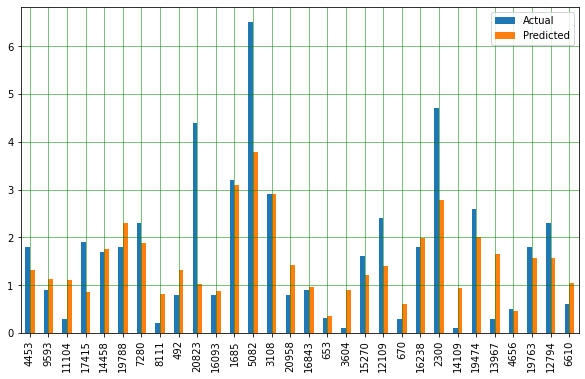

In [18]:
df_temp2 = df_temp2.head(30)
df_temp2.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()

In [19]:
from sklearn.metrics import r2_score
score= r2_score(testY,grid_predictions)
score

0.4989756210365116

In [20]:
from sklearn.metrics import r2_score
score= r2_score(testY,y_pred)
score

0.3540184004397575

In [ ]:
plt.plot(mlp_reg.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')